In [3]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

2020-06-05 08:04:29,694 : INFO : 'pattern' package not found; tag filters are not available for English


In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_PATH_DICT['ad_id'])
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_PATH_DICT['ad_id'])

In [6]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [7]:
grid_df['ad_id'] = grid_df['ad_id'].map(lambda x: list(map(str, x)))

In [8]:
sentences = grid_df['ad_id'].values.tolist()

In [9]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [15]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/huangzc/competition/tencent/model_ckpt/gensim/model.txt')
        self.epoch += 1

In [115]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 50,
          'window': 20,
          'min_count': 2,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': 25,
          'callbacks': [callback()]}

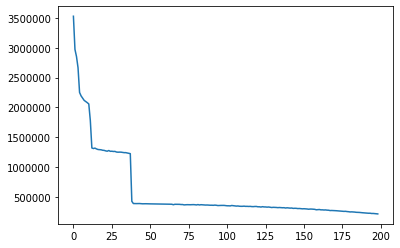

2020-06-07 08:48:58,761 : INFO : saving Word2Vec object under /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt, separately None
2020-06-07 08:48:58,762 : INFO : storing np array 'vectors' to /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.vectors.npy


loss list:  [5278968.5, 8808450.0, 11781634.0, 14635316.0, 17301906.0, 19553312.0, 21747004.0, 23903944.0, 26022590.0, 28122340.0, 30203244.0, 32262042.0, 34043096.0, 35364176.0, 36675700.0, 37994172.0, 39299444.0, 40594820.0, 41886984.0, 43177544.0, 44460484.0, 45741024.0, 47013240.0, 48279912.0, 49558492.0, 50823416.0, 52089828.0, 53352044.0, 54615648.0, 55868716.0, 57118996.0, 58370536.0, 59621400.0, 60868752.0, 62111216.0, 63354120.0, 64591072.0, 65823496.0, 67049340.0, 67476056.0, 67865408.0, 68253840.0, 68642280.0, 69031856.0, 69421296.0, 69808296.0, 70193376.0, 70579488.0, 70965576.0, 71350360.0, 71732872.0, 72116784.0, 72500224.0, 72883344.0, 73266424.0, 73647184.0, 74028072.0, 74408640.0, 74789056.0, 75168248.0, 75546616.0, 75925624.0, 76303744.0, 76680376.0, 77057464.0, 77435144.0, 77804808.0, 78181656.0, 78558128.0, 78932760.0, 79308712.0, 79681432.0, 80054296.0, 80421104.0, 80789240.0, 81159656.0, 81528552.0, 81897688.0, 82268176.0, 82639472.0, 83009112.0, 83374944.0, 83746

2020-06-07 08:48:59,119 : INFO : not storing attribute vectors_norm
2020-06-07 08:48:59,120 : INFO : storing np array 'syn1neg' to /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.syn1neg.npy
2020-06-07 08:48:59,459 : INFO : not storing attribute cum_table
2020-06-07 08:49:06,727 : INFO : saved /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt
2020-06-07 08:49:06,729 : INFO : training on a 12733602800 raw words (11757784120 effective words) took 17686.1s, 664803 effective words/s


In [116]:
model = Word2Vec(**params)

In [109]:
# ### Restore Model
# # #####################################
save_path = '/home/huangzc/competition/tencent/model_ckpt/gensim/model.txt'
model = Word2Vec.load(save_path)

2020-06-07 02:00:13,683 : INFO : loading Word2Vec object from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt
2020-06-07 02:00:24,130 : INFO : loading wv recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.* with mmap=None
2020-06-07 02:00:24,132 : INFO : loading vectors from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.wv.vectors.npy with mmap=None
2020-06-07 02:00:24,447 : INFO : setting ignored attribute vectors_norm to None
2020-06-07 02:00:24,448 : INFO : loading vocabulary recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.vocabulary.* with mmap=None
2020-06-07 02:00:24,449 : INFO : loading trainables recursively from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.* with mmap=None
2020-06-07 02:00:24,449 : INFO : loading syn1neg from /home/huangzc/competition/tencent/model_ckpt/gensim/model.txt.trainables.syn1neg.npy with mmap=None
2020-06-07 02:00:24,757 : INFO : se

### 新方法

In [110]:
vocab = model.wv.index2word

In [111]:
vocab_dict = dict(zip(vocab, list(range(len(vocab)))))

In [112]:
f = open(TRAIN_DIR+'gensim_ad_id_dict.js','w')
f.write(str(vocab_dict))
f.close()

In [113]:
wv_matrix = model.wv.vectors

In [114]:
np.save(TRAIN_DIR+'gensim_ad_id.npy', wv_matrix)